# Understanding the Data and Preparation 

Data Set link frm kaggle : https://www.kaggle.com/wordsforthewise/lending-club
    
    1. Idea of Data and Business Surroundings around it
    2. How Data is Collected? 
    3. Data is Raw or Summarized Data?
    4. How the data is getting summarized?
    5. Descriptive Statistics
    6. Inferencial Statistics

In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
df = pd.read_csv('loan_analysis.csv',nrows=1000000)
df.head()

d:\anacondafiles\envs\deeplearning\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,loan_amnt,int_rate,installment,grade,emp_title,home_ownership,annual_inc,loan_status,purpose,...,inq_last_6mths,mths_since_last_delinq,revol_bal,initial_list_status,out_prncp,last_fico_range_high,last_fico_range_low,application_type,annual_inc_joint,dti_joint
0,68407277,3600.0,13.99,123.03,C,leadman,MORTGAGE,55000.0,Fully Paid,debt_consolidation,...,1.0,30.0,2765.0,w,0.00,564.0,560.0,Individual,NaN,NaN
1,68355089,24700.0,11.99,820.28,C,Engineer,MORTGAGE,65000.0,Fully Paid,small_business,...,4.0,6.0,21470.0,w,0.00,699.0,695.0,Individual,NaN,NaN
2,68341763,20000.0,10.78,432.66,B,truck driver,MORTGAGE,63000.0,Fully Paid,home_improvement,...,0.0,NaN,7869.0,w,0.00,704.0,700.0,Joint App,71000.0,13.85
3,66310712,35000.0,14.85,829.90,C,Information Systems Officer,MORTGAGE,110000.0,Current,debt_consolidation,...,0.0,NaN,7802.0,w,15897.65,679.0,675.0,Individual,NaN,NaN
4,68476807,10400.0,22.45,289.91,F,Contract Specialist,MORTGAGE,104433.0,Fully Paid,major_purchase,...,3.0,12.0,21929.0,w,0.00,704.0,700.0,Individual,NaN,NaN


In [90]:
df.shape

(1000000, 25)

In [91]:
df.columns

Index(['id', 'loan_amnt', 'int_rate', 'installment', 'grade', 'emp_title',
       'home_ownership', 'annual_inc', 'loan_status', 'purpose', 'title',
       'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'mths_since_last_delinq', 'revol_bal',
       'initial_list_status', 'out_prncp', 'last_fico_range_high',
       'last_fico_range_low', 'application_type', 'annual_inc_joint',
       'dti_joint'],
      dtype='object')

<AxesSubplot:xlabel='fico_range_low', ylabel='int_rate'>

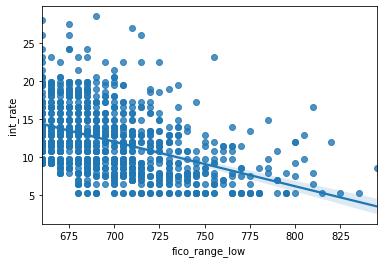

In [92]:
# SO AS WE INCREASE THE NO. OF RECORDS THE PLOTS BECOMES VERY NOISER AND WE CANT WORK WITH SUCH DATA

sns.regplot(x='fico_range_low', y="int_rate", data=df[:1000])

In [93]:
df['loan_status'].value_counts()

Fully Paid            450285
Current               411982
Charged Off           121189
Late (31-120 days)     10475
In Grace Period         3997
Late (16-30 days)       2040
Default                   20
Name: loan_status, dtype: int64

In [94]:
df = df[df['loan_status'].isin(['Charged Off', 'Default', 'Fully Paid'])]
df.head()

,id,loan_amnt,int_rate,installment,grade,emp_title,home_ownership,annual_inc,loan_status,purpose,...,inq_last_6mths,mths_since_last_delinq,revol_bal,initial_list_status,out_prncp,last_fico_range_high,last_fico_range_low,application_type,annual_inc_joint,dti_joint
0,68407277,3600.0,13.99,123.03,C,leadman,MORTGAGE,55000.0,Fully Paid,debt_consolidation,...,1.0,30.0,2765.0,w,0.0,564.0,560.0,Individual,NaN,NaN
1,68355089,24700.0,11.99,820.28,C,Engineer,MORTGAGE,65000.0,Fully Paid,small_business,...,4.0,6.0,21470.0,w,0.0,699.0,695.0,Individual,NaN,NaN
2,68341763,20000.0,10.78,432.66,B,truck driver,MORTGAGE,63000.0,Fully Paid,home_improvement,...,0.0,NaN,7869.0,w,0.0,704.0,700.0,Joint App,71000.0,13.85
4,68476807,10400.0,22.45,289.91,F,Contract Specialist,MORTGAGE,104433.0,Fully Paid,major_purchase,...,3.0,12.0,21929.0,w,0.0,704.0,700.0,Individual,NaN,NaN
5,68426831,11950.0,13.44,405.18,C,Veterinary Tecnician,RENT,34000.0,Fully Paid,debt_consolidation,...,0.0,NaN,8822.0,w,0.0,759.0,755.0,Individual,NaN,NaN


In [95]:
# NOW SUMMARIZING THE OUTPUT COLUMNS AND TAKING ONLY FULLY PAID , CHARGED OFF AND DEFAULT

loan_int_df = df[df['loan_status'].isin(['Charged Off', 'Default', 'Fully Paid'])]
loan_int_df['loan_status'].value_counts()

Fully Paid     450285
Charged Off    121189
Default            20
Name: loan_status, dtype: int64

In [96]:
loan_int_df.groupby('loan_status').agg({'last_fico_range_high':'mean'})

,last_fico_range_high
loan_status,
Charged Off,564.360660
Default,590.750000
Fully Paid,705.503885


In [97]:
loan_int_df.groupby('loan_status')['last_fico_range_high'].mean()

loan_status
Charged Off    564.360660
Default        590.750000
Fully Paid     705.503885
Name: last_fico_range_high, dtype: float64

In [98]:
loan_int_df['loan_status'] = loan_int_df['loan_status'].replace('Charged Off', 'Default')
loan_int_df['loan_status'] = loan_int_df['loan_status'].replace('Fully Paid', 'Good')


In [99]:
loan_int_df['loan_status'].value_counts()

Good       450285
Default    121209
Name: loan_status, dtype: int64

In [100]:
loan_int_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 571494 entries, 0 to 999998
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      571494 non-null  object 
 1   loan_amnt               571494 non-null  float64
 2   int_rate                571494 non-null  float64
 3   installment             571494 non-null  float64
 4   grade                   571494 non-null  object 
 5   emp_title               535312 non-null  object 
 6   home_ownership          571494 non-null  object 
 7   annual_inc              571494 non-null  float64
 8   loan_status             571494 non-null  object 
 9   purpose                 571494 non-null  object 
 10  title                   566275 non-null  object 
 11  dti                     571280 non-null  float64
 12  delinq_2yrs             571494 non-null  float64
 13  fico_range_low          571494 non-null  float64
 14  fico_range_high     

In [101]:
loan_int_df['fico_range_low'].min(), loan_int_df['fico_range_low'].max()

(660.0, 845.0)

In [102]:
# LAST FICO RANGE  MEANS AFTER THE LOAN HAS BEEN TAKEN THE FICO RANGE MAY CHANGE

loan_int_df['last_fico_range_low'].min() , loan_int_df['last_fico_range_low'].max()

(0.0, 845.0)

In [107]:
# NOW REPLACING THE LAST FICO RANGE VALUE WHERE == 0 REPLACING WITH FICO RANGE LOW


loan_int_df['last_fico_range_low'] = np.where(loan_int_df['last_fico_range_low']==0.0, loan_int_df['fico_range_low'], loan_int_df['last_fico_range_low'])

In [108]:
loan_int_df['last_fico_range_low'].min() , loan_int_df['last_fico_range_low'].max()

(500.0, 845.0)

In [114]:
import math

# CREATING A NEW COLUMN AND IMPUTING THE ROUNDED OFF VALUES 

loan_int_df['fico_score'] = loan_int_df['last_fico_range_low'].apply(lambda x:int(math.ceil(x/10))*10)
loan_int_df.head()

,id,loan_amnt,int_rate,installment,grade,emp_title,home_ownership,annual_inc,loan_status,purpose,...,mths_since_last_delinq,revol_bal,initial_list_status,out_prncp,last_fico_range_high,last_fico_range_low,application_type,annual_inc_joint,dti_joint,fico_score
0,68407277,3600.0,13.99,123.03,C,leadman,MORTGAGE,55000.0,Good,debt_consolidation,...,30.0,2765.0,w,0.0,564.0,560.0,Individual,NaN,NaN,560
1,68355089,24700.0,11.99,820.28,C,Engineer,MORTGAGE,65000.0,Good,small_business,...,6.0,21470.0,w,0.0,699.0,695.0,Individual,NaN,NaN,700
2,68341763,20000.0,10.78,432.66,B,truck driver,MORTGAGE,63000.0,Good,home_improvement,...,NaN,7869.0,w,0.0,704.0,700.0,Joint App,71000.0,13.85,700
4,68476807,10400.0,22.45,289.91,F,Contract Specialist,MORTGAGE,104433.0,Good,major_purchase,...,12.0,21929.0,w,0.0,704.0,700.0,Individual,NaN,NaN,700
5,68426831,11950.0,13.44,405.18,C,Veterinary Tecnician,RENT,34000.0,Good,debt_consolidation,...,NaN,8822.0,w,0.0,759.0,755.0,Individual,NaN,NaN,760


In [115]:
loan_int_df.isnull().sum()

id                             0
loan_amnt                      0
int_rate                       0
installment                    0
grade                          0
emp_title                  36182
home_ownership                 0
annual_inc                     0
loan_status                    0
purpose                        0
title                       5219
dti                          214
delinq_2yrs                    0
fico_range_low                 0
fico_range_high                0
inq_last_6mths                 0
mths_since_last_delinq    278614
revol_bal                      0
initial_list_status            0
out_prncp                      0
last_fico_range_high           0
last_fico_range_low            0
application_type               0
annual_inc_joint          558894
dti_joint                 558895
fico_score                     0
dtype: int64

In [116]:
loan_int_df[loan_int_df['dti'].isnull()]

# SO WHERE EVER THE DTI IS NULL THERE THE APPLICAITON TYPE IS JOINT APP AND DTI JOINT IS HAVING VALUES

,id,loan_amnt,int_rate,installment,grade,emp_title,home_ownership,annual_inc,loan_status,purpose,...,mths_since_last_delinq,revol_bal,initial_list_status,out_prncp,last_fico_range_high,last_fico_range_low,application_type,annual_inc_joint,dti_joint,fico_score
18202,66415476,20000.0,16.99,712.96,D,NaN,MORTGAGE,0.0,Good,debt_consolidation,...,NaN,7161.0,w,0.0,649.0,645.0,Joint App,185000.0,5.31,650
65620,65199509,3700.0,12.59,123.94,C,NaN,MORTGAGE,0.0,Default,credit_card,...,10.0,10649.0,f,0.0,539.0,535.0,Joint App,40988.0,28.72,540
422321,130138254,40000.0,15.04,1387.40,C,NaN,MORTGAGE,0.0,Default,debt_consolidation,...,6.0,5646.0,w,0.0,584.0,580.0,Joint App,200000.0,22.90,580
422892,130712137,21000.0,11.98,697.30,B,NaN,MORTGAGE,0.0,Good,debt_consolidation,...,NaN,11846.0,w,0.0,704.0,700.0,Joint App,70000.0,8.45,700
424935,129700950,16800.0,7.34,335.37,A,NaN,MORTGAGE,0.0,Good,home_improvement,...,NaN,288.0,w,0.0,759.0,755.0,Joint App,130000.0,8.90,760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985006,75718749,12000.0,11.99,398.52,C,NaN,MORTGAGE,0.0,Default,debt_consolidation,...,NaN,10409.0,w,0.0,509.0,505.0,Joint App,115000.0,20.20,510
988271,74502396,15000.0,9.16,478.12,B,NaN,MORTGAGE,0.0,Good,credit_card,...,NaN,13227.0,w,0.0,694.0,690.0,Joint App,56000.0,30.30,690
994170,75718314,9100.0,12.99,306.58,C,NaN,RENT,0.0,Good,debt_consolidation,...,4.0,3199.0,w,0.0,659.0,655.0,Joint App,65000.0,8.71,660
998856,75303004,17500.0,22.45,487.82,E,NaN,MORTGAGE,0.0,Default,debt_consolidation,...,NaN,12992.0,w,0.0,549.0,545.0,Joint App,50000.0,9.84,550


**Again creating new columns and calculating the final dti  &  annual inc final**

In [122]:
loan_int_df['dti_final'] = loan_int_df.apply(lambda x : x['dti_joint'] if pd.isnull(x['dti']) else x['dti'], axis=1)

In [123]:
pd.isnull(loan_int_df['dti'])

0         False
1         False
2         False
4         False
5         False
          ...  
999993    False
999994    False
999996    False
999997    False
999998    False
Name: dti, Length: 571494, dtype: bool

In [124]:
loan_int_df['annual_inc_final'] = loan_int_df.apply(lambda x:x['annual_inc_joint'] if x['annual_inc']==0.0 else x['annual_inc'], axis=1)

In [125]:
loan_int_df.isnull().sum()

id                             0
loan_amnt                      0
int_rate                       0
installment                    0
grade                          0
emp_title                  36182
home_ownership                 0
annual_inc                     0
loan_status                    0
purpose                        0
title                       5219
dti                          214
delinq_2yrs                    0
fico_range_low                 0
fico_range_high                0
inq_last_6mths                 0
mths_since_last_delinq    278614
revol_bal                      0
initial_list_status            0
out_prncp                      0
last_fico_range_high           0
last_fico_range_low            0
application_type               0
annual_inc_joint          558894
dti_joint                 558895
fico_score                     0
dti_final                      0
annual_inc_final               0
dtype: int64

In [126]:
loan_int_df['fico_score'].value_counts().sort_index()

500     3385
510     7745
520     9168
530    10323
540    11562
550    12003
560    11892
570    11617
580    11053
590    10242
600     9838
610    10145
620    10360
630    11159
640    13053
650    16101
660    23833
670    31439
680    35471
690    37792
700    37823
710    36942
720    35390
730    31196
740    25889
750    21570
760    18267
770    16103
780    14422
790    11900
800     9536
810     7018
820     4364
830     2152
840      627
850      114
Name: fico_score, dtype: int64

In [127]:
fico_df = loan_int_df['fico_score'].value_counts().sort_index()
fico_df.head()

500     3385
510     7745
520     9168
530    10323
540    11562
Name: fico_score, dtype: int64

In [128]:
loan_int_df[loan_int_df['loan_status']=='Default']['fico_score'].value_counts().sort_index()


500    2997
510    6767
520    7813
530    8672
540    9475
550    9507
560    9099
570    8503
580    7542
590    6448
600    5493
610    4874
620    4184
630    3481
640    2740
650    2165
660    3828
670    4919
680    3658
690    2699
700    1919
710    1435
720     956
730     568
740     420
750     283
760     219
770     161
780     129
790      88
800      70
810      50
820      25
830      13
840       6
850       3
Name: fico_score, dtype: int64

In [130]:
loan_int_df[['fico_score', 'dti_final', 'loan_amnt', 'annual_inc']].groupby('fico_score').agg({'dti_final' : 'mean', 'loan_amnt' : 'mean', 'annual_inc' : 'mean'})

,dti_final,loan_amnt,annual_inc
fico_score,,,
500,19.728762,13692.311669,63511.205814
510,19.749380,13861.323434,65471.300058
520,20.052651,14199.157395,68391.296443
530,20.223831,14501.266589,69136.251070
540,20.730541,14782.768985,70258.732958
550,20.762790,14856.410897,70136.183165
560,20.913384,15092.768248,72616.148949
570,20.695903,15092.338814,72701.495557
580,20.673045,15000.959016,73176.015062


In [131]:
loan_int_df[['fico_score', 'annual_inc', 'int_rate']].groupby('fico_score').mean()

,annual_inc,int_rate
fico_score,,
500,63511.205814,15.341982
510,65471.300058,15.439957
520,68391.296443,15.331814
530,69136.251070,15.457357
540,70258.732958,15.273070
550,70136.183165,15.049104
560,72616.148949,14.922038
570,72701.495557,14.848253
580,73176.015062,14.786092


### Concatenating all

In [132]:
fico_df = pd.concat([fico_df,
                     pd.DataFrame(loan_int_df[loan_int_df['loan_status']=='Default']['fico_score'].value_counts().sort_index()),
                     pd.DataFrame(loan_int_df[['fico_score', 'dti_final', 'loan_amnt', 'annual_inc']].groupby('fico_score').agg({'dti_final' : 'mean', 'loan_amnt' : 'mean', 'annual_inc' : 'mean'})),
                     loan_int_df[['fico_score', 'annual_inc', 'int_rate']].groupby('fico_score').mean()],ignore_index=True, axis=1)

In [133]:
fico_df.head()

,0,1,2,3,4,5,6
500,3385,2997,19.728762,13692.311669,63511.205814,63511.205814,15.341982
510,7745,6767,19.749380,13861.323434,65471.300058,65471.300058,15.439957
520,9168,7813,20.052651,14199.157395,68391.296443,68391.296443,15.331814
530,10323,8672,20.223831,14501.266589,69136.251070,69136.251070,15.457357
540,11562,9475,20.730541,14782.768985,70258.732958,70258.732958,15.273070


In [135]:
# RESETING THE INDEX SO THAT FICO SCORE BECOMES A COLUMN

fico_df = fico_df.reset_index()

In [140]:
fico_df.columns = ['fico_score', 'loan_total', 'default_total', 'dti', 'avg_loan_amnt', 'median_annual_inc', 'avg_annual_inc', 'int_rate']


In [141]:
fico_df.head()

,fico_score,loan_total,default_total,dti,avg_loan_amnt,median_annual_inc,avg_annual_inc,int_rate
0,500,3385,2997,19.728762,13692.311669,63511.205814,63511.205814,15.341982
1,510,7745,6767,19.749380,13861.323434,65471.300058,65471.300058,15.439957
2,520,9168,7813,20.052651,14199.157395,68391.296443,68391.296443,15.331814
3,530,10323,8672,20.223831,14501.266589,69136.251070,69136.251070,15.457357
4,540,11562,9475,20.730541,14782.768985,70258.732958,70258.732958,15.273070


In [142]:
fico_df['default_rate'] = (fico_df['default_total']/(fico_df['default_total'].sum())*100)
fico_df['actual_default_rate'] = (fico_df['default_total']/(fico_df['loan_total'].sum())*100)

In [143]:
fico_df.head(20)

,fico_score,loan_total,default_total,dti,avg_loan_amnt,median_annual_inc,avg_annual_inc,int_rate,default_rate,actual_default_rate
0,500,3385,2997,19.728762,13692.311669,63511.205814,63511.205814,15.341982,2.472589,0.524415
1,510,7745,6767,19.749380,13861.323434,65471.300058,65471.300058,15.439957,5.582919,1.184089
2,520,9168,7813,20.052651,14199.157395,68391.296443,68391.296443,15.331814,6.445891,1.367118
3,530,10323,8672,20.223831,14501.266589,69136.251070,69136.251070,15.457357,7.154584,1.517426
4,540,11562,9475,20.730541,14782.768985,70258.732958,70258.732958,15.273070,7.817076,1.657935
5,550,12003,9507,20.762790,14856.410897,70136.183165,70136.183165,15.049104,7.843477,1.663535
6,560,11892,9099,20.913384,15092.768248,72616.148949,72616.148949,14.922038,7.506868,1.592143
7,570,11617,8503,20.695903,15092.338814,72701.495557,72701.495557,14.848253,7.015156,1.487855
8,580,11053,7542,20.673045,15000.959016,73176.015062,73176.015062,14.786092,6.222310,1.319699
9,590,10242,6448,20.695109,14893.177602,72209.688489,72209.688489,14.740223,5.319737,1.128271


In [144]:
fico_df.describe()

,fico_score,loan_total,default_total,dti,avg_loan_amnt,median_annual_inc,avg_annual_inc,int_rate,default_rate,actual_default_rate
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,675.000000,15874.833333,3366.916667,18.764635,15116.516044,77470.849713,77470.849713,12.551522,2.777778,0.589143
std,105.356538,11133.239822,3291.696127,1.666750,1700.517919,8200.208530,8200.208530,2.534705,2.715719,0.575981
min,500.000000,114.000000,3.000000,14.755000,12968.018084,63511.205814,63511.205814,7.646332,0.002475,0.000525
25%,587.500000,9762.500000,204.500000,17.655941,14036.071838,72514.533834,72514.533834,10.490431,0.168717,0.035783
50%,675.000000,11754.500000,2719.500000,19.032935,14874.794250,74945.252098,74945.252098,13.585040,2.243645,0.475858
75%,762.500000,22135.750000,5731.750000,20.121337,15349.372890,80405.347043,80405.347043,14.751690,4.728816,1.002941
max,850.000000,37823.000000,9507.000000,20.913384,20587.500000,99795.977096,99795.977096,15.457357,7.843477,1.663535


In [145]:
fico_df.corr()

,fico_score,loan_total,default_total,dti,avg_loan_amnt,median_annual_inc,avg_annual_inc,int_rate,default_rate,actual_default_rate
fico_score,1.000000,0.062977,-0.887156,-0.926072,0.680202,0.919112,0.919112,-0.968734,-0.887156,-0.887156
loan_total,0.062977,1.000000,-0.141657,0.137558,-0.480284,-0.111464,-0.111464,0.119283,-0.141657,-0.141657
default_total,-0.887156,-0.141657,1.000000,0.847536,-0.440603,-0.732483,-0.732483,0.850369,1.000000,1.000000
dti,-0.926072,0.137558,0.847536,1.000000,-0.782182,-0.898459,-0.898459,0.962986,0.847536,0.847536
avg_loan_amnt,0.680202,-0.480284,-0.440603,-0.782182,1.000000,0.830034,0.830034,-0.797160,-0.440603,-0.440603
median_annual_inc,0.919112,-0.111464,-0.732483,-0.898459,0.830034,1.000000,1.000000,-0.941490,-0.732483,-0.732483
avg_annual_inc,0.919112,-0.111464,-0.732483,-0.898459,0.830034,1.000000,1.000000,-0.941490,-0.732483,-0.732483
int_rate,-0.968734,0.119283,0.850369,0.962986,-0.797160,-0.941490,-0.941490,1.000000,0.850369,0.850369
default_rate,-0.887156,-0.141657,1.000000,0.847536,-0.440603,-0.732483,-0.732483,0.850369,1.000000,1.000000
actual_default_rate,-0.887156,-0.141657,1.000000,0.847536,-0.440603,-0.732483,-0.732483,0.850369,1.000000,1.000000


In [146]:
fico_df.corr(method='spearman')

,fico_score,loan_total,default_total,dti,avg_loan_amnt,median_annual_inc,avg_annual_inc,int_rate,default_rate,actual_default_rate
fico_score,1.000000,0.035779,-0.939511,-0.936937,0.661004,0.964479,0.964479,-0.997169,-0.939511,-0.939511
loan_total,0.035779,1.000000,0.088288,0.038095,-0.354440,0.039382,0.039382,-0.027284,0.088288,0.088288
default_total,-0.939511,0.088288,1.000000,0.968082,-0.600515,-0.898842,-0.898842,0.950322,1.000000,1.000000
dti,-0.936937,0.038095,0.968082,1.000000,-0.572458,-0.893179,-0.893179,0.938481,0.968082,0.968082
avg_loan_amnt,0.661004,-0.354440,-0.600515,-0.572458,1.000000,0.704247,0.704247,-0.656113,-0.600515,-0.600515
median_annual_inc,0.964479,0.039382,-0.898842,-0.893179,0.704247,1.000000,1.000000,-0.964736,-0.898842,-0.898842
avg_annual_inc,0.964479,0.039382,-0.898842,-0.893179,0.704247,1.000000,1.000000,-0.964736,-0.898842,-0.898842
int_rate,-0.997169,-0.027284,0.950322,0.938481,-0.656113,-0.964736,-0.964736,1.000000,0.950322,0.950322
default_rate,-0.939511,0.088288,1.000000,0.968082,-0.600515,-0.898842,-0.898842,0.950322,1.000000,1.000000
actual_default_rate,-0.939511,0.088288,1.000000,0.968082,-0.600515,-0.898842,-0.898842,0.950322,1.000000,1.000000


In [147]:
fico_df.corr()

,fico_score,loan_total,default_total,dti,avg_loan_amnt,median_annual_inc,avg_annual_inc,int_rate,default_rate,actual_default_rate
fico_score,1.000000,0.062977,-0.887156,-0.926072,0.680202,0.919112,0.919112,-0.968734,-0.887156,-0.887156
loan_total,0.062977,1.000000,-0.141657,0.137558,-0.480284,-0.111464,-0.111464,0.119283,-0.141657,-0.141657
default_total,-0.887156,-0.141657,1.000000,0.847536,-0.440603,-0.732483,-0.732483,0.850369,1.000000,1.000000
dti,-0.926072,0.137558,0.847536,1.000000,-0.782182,-0.898459,-0.898459,0.962986,0.847536,0.847536
avg_loan_amnt,0.680202,-0.480284,-0.440603,-0.782182,1.000000,0.830034,0.830034,-0.797160,-0.440603,-0.440603
median_annual_inc,0.919112,-0.111464,-0.732483,-0.898459,0.830034,1.000000,1.000000,-0.941490,-0.732483,-0.732483
avg_annual_inc,0.919112,-0.111464,-0.732483,-0.898459,0.830034,1.000000,1.000000,-0.941490,-0.732483,-0.732483
int_rate,-0.968734,0.119283,0.850369,0.962986,-0.797160,-0.941490,-0.941490,1.000000,0.850369,0.850369
default_rate,-0.887156,-0.141657,1.000000,0.847536,-0.440603,-0.732483,-0.732483,0.850369,1.000000,1.000000
actual_default_rate,-0.887156,-0.141657,1.000000,0.847536,-0.440603,-0.732483,-0.732483,0.850369,1.000000,1.000000


In [148]:
fico_df.to_csv('loan_analysis_summary.csv', index=False)